In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# load dataset
pima = pd.read_csv("C:\\ksr\\data science\\DS_batch1\\datasets\\diabetes.csv")

In [3]:
pima.shape

(768, 9)

In [4]:
pima.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [6]:
pima["Outcome"].value_counts()/len(pima)*100

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

In [7]:
from sklearn.model_selection import train_test_split
train,test=train_test_split(pima,test_size=0.2,random_state=0)

In [8]:
x_train=train.drop(["Outcome"],1)
y_train=train["Outcome"]
x_test=test.drop(["Outcome"],1)
y_test=test["Outcome"]

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf=DecisionTreeClassifier()
clf.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [10]:
clf.score(x_train,y_train)

1.0

In [11]:
clf.score(x_test,y_test)

0.7857142857142857

In [15]:
for i in range(2,20):
    clf1=DecisionTreeClassifier(max_depth=i)
    clf1.fit(x_train,y_train)
    print("each iteration max depth values train data ", i,"score is ",clf1.score(x_train,y_train))
    print("each iteration max depth values test data ", i,"score is ",clf1.score(x_test,y_test))

each iteration max depth values train data  2 score is  0.7638436482084691
each iteration max depth values test data  2 score is  0.7597402597402597
each iteration max depth values train data  3 score is  0.7638436482084691
each iteration max depth values test data  3 score is  0.7597402597402597
each iteration max depth values train data  4 score is  0.7817589576547231
each iteration max depth values test data  4 score is  0.7662337662337663
each iteration max depth values train data  5 score is  0.8224755700325733
each iteration max depth values test data  5 score is  0.7532467532467533
each iteration max depth values train data  6 score is  0.8485342019543974
each iteration max depth values test data  6 score is  0.7597402597402597
each iteration max depth values train data  7 score is  0.8859934853420195
each iteration max depth values test data  7 score is  0.8116883116883117
each iteration max depth values train data  8 score is  0.9218241042345277
each iteration max depth values

In [27]:
clf2=DecisionTreeClassifier(max_depth=4,criterion="entropy")
clf2.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [28]:
print("training_accuracy",clf2.score(x_train,y_train))
print("testing_accuracy",clf2.score(x_test,y_test))

training_accuracy 0.7768729641693811
testing_accuracy 0.7402597402597403


In [29]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz,export
import os     
import pydotplus
import graphviz
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38\bin'

In [30]:
export_graphviz(clf2,
              out_file = "tree.odt",
              feature_names = x_train.columns)

In [31]:
import pydotplus as pdot
chd_tree_graph = pdot.graphviz.graph_from_dot_file('tree.odt')

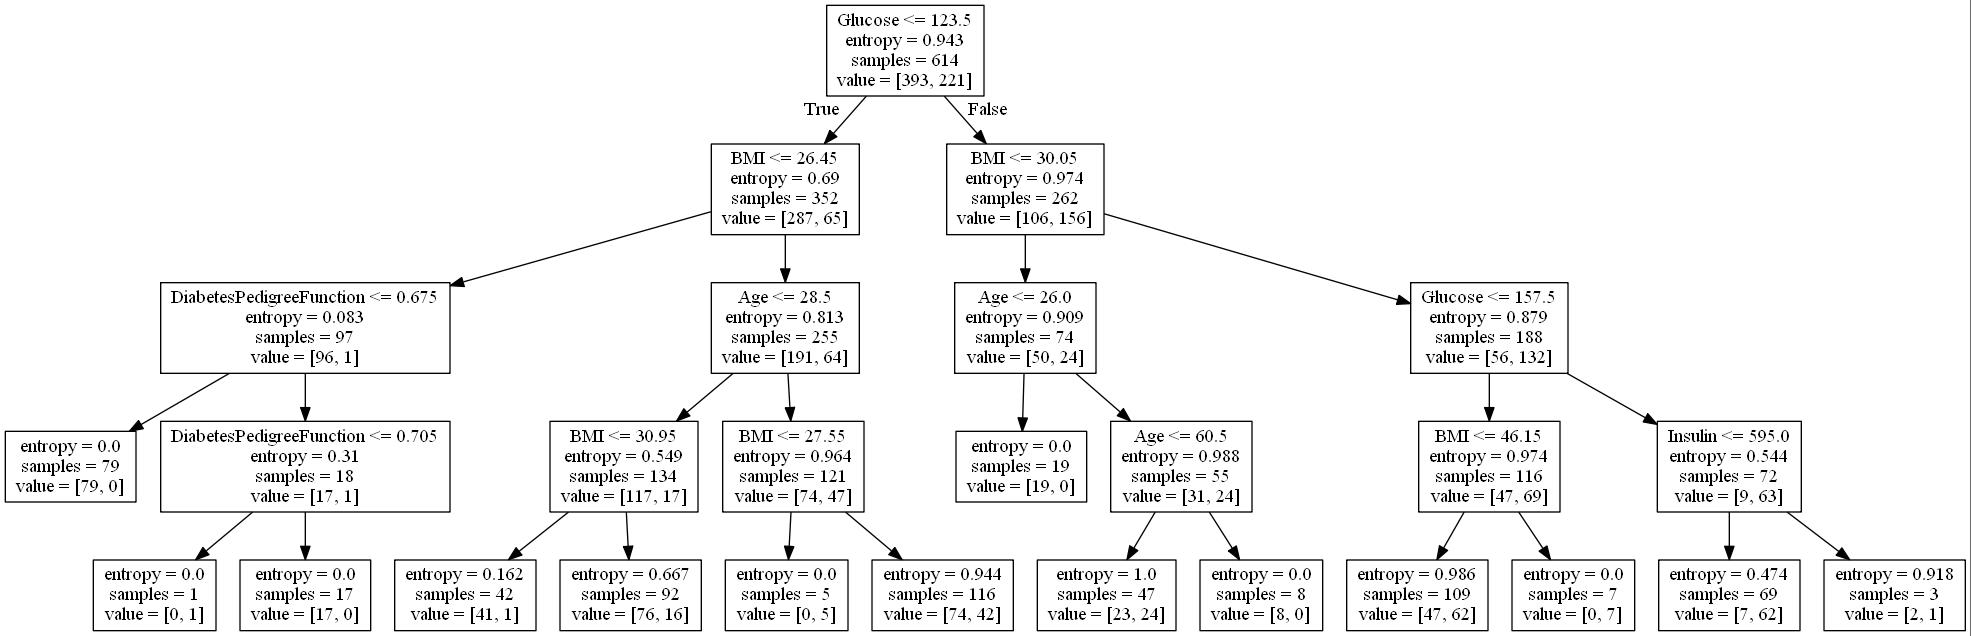

In [32]:
chd_tree_graph.write_jpg('tree.jpg')
from IPython.display import Image
Image(filename='tree.jpg')

In [33]:
from sklearn.tree import ExtraTreeClassifier
et=ExtraTreeClassifier()
et.fit(x_train,y_train)

ExtraTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0, min_impurity_split=None,
                    min_samples_leaf=1, min_samples_split=2,
                    min_weight_fraction_leaf=0.0, random_state=None,
                    splitter='random')

In [34]:
et.feature_importances_

array([0.13469222, 0.20431441, 0.07732965, 0.09172903, 0.07804644,
       0.16870967, 0.08970988, 0.1554687 ])

In [36]:
list(zip(x_train.columns,et.feature_importances_))

[('Pregnancies', 0.13469221748269744),
 ('Glucose', 0.20431440854044378),
 ('BloodPressure', 0.07732965071378513),
 ('SkinThickness', 0.09172902947481158),
 ('Insulin', 0.07804643846105086),
 ('BMI', 0.16870967412945287),
 ('DiabetesPedigreeFunction', 0.08970987849204796),
 ('Age', 0.15546870270571042)]

In [37]:
et1=DecisionTreeClassifier(max_depth=4)
et1.fit(x_train,y_train)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [38]:
et1.feature_importances_

array([0.01701508, 0.53837657, 0.02725875, 0.        , 0.01606477,
       0.21554907, 0.        , 0.18573576])